In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
%matplotlib inline

In [16]:
import heapq

In [21]:
def calculate_diff(generated, truth, k):
    diff= {}
    data_points= len(generated[list(generated.keys())[0]]['cases'])
    heap= []
    
    for country in generated:
        diff[country]= {'cases': 0, 'deaths': 0, 'recoveries': 0, 'total': 0}
        
        for index in range(data_points):
            diff[country]['cases']+= (generated[country]['cases'][index] - truth[country]['cases'][index])**2
            diff[country]['deaths']+= (generated[country]['deaths'][index] - truth[country]['deaths'][index])**2
            diff[country]['recoveries']+= (generated[country]['recoveries'][index] - truth[country]['recoveries'][index])**2
        
        diff[country]['cases']/= data_points
        diff[country]['deaths']/= data_points
        diff[country]['recoveries']/= data_points
        diff[country]['total']= diff[country]['cases'] + diff[country]['deaths'] + diff[country]['recoveries']
        
        if len(heap) < k:
            heapq.heappush(heap, (diff[country]['total'], country))
        else:
            heapq.heappushpop(heap, (diff[country]['total'], country))
            
    
    return diff, heap

In [73]:
def plot_max_error_countries(generated, truth, countries):
    case_error= []
    deaths_error= []
    recoveries_error= []
    diff= {}
    data_points= len(generated[list(generated.keys())[0]]['cases'])

    for _, country in countries:
        diff[country]= {"cases": [], "deaths": [], "recoveries": []}
        
        for index in range(data_points):
            diff[country]['cases'].append((generated[country]['cases'][index] - truth[country]['cases'][index])**2)
            diff[country]['deaths'].append((generated[country]['deaths'][index] - truth[country]['deaths'][index])**2)
            diff[country]['recoveries'].append((generated[country]['recoveries'][index] - truth[country]['recoveries'][index])**2)   
    
    for country in diff:        
        fig, ax = plt.subplots()
        ax.set_title(country)
        ax.plot(diff[country]['cases'], marker='o', markersize=12,  linewidth= 4, label= 'cases')
        ax.plot(diff[country]['recoveries'], marker='o', markersize=12, linewidth= 4, label= 'recoveries')
        ax.plot(diff[country]['deaths'], marker='o', markersize=12,  linewidth= 4, label= 'deaths')
        ax.legend()

    

In [75]:
def driver(generated, truth, k):
    diff, max_error_countries= calculate_diff(generated, truth, k)
    plot_max_error_countries(generated, truth, max_error_countries)   

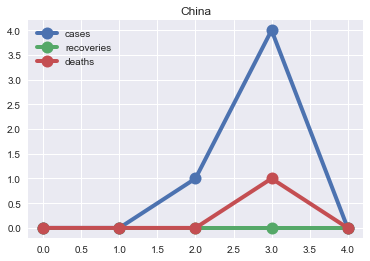

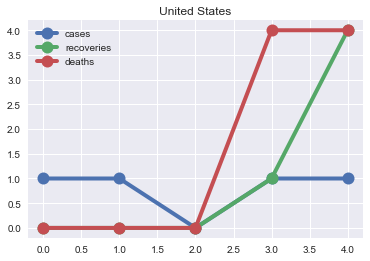

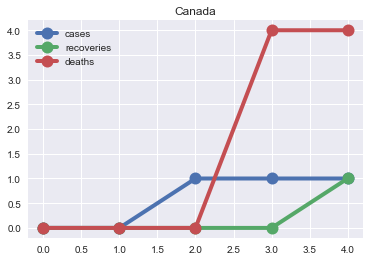

In [78]:
## dummy values

generated= {"China": {
                "cases": [1, 2, 3, 4, 5],
                "deaths": [0, 0, 1, 3, 4], 
                "recoveries": [0, 0, 1, 1, 1]},
            "United States": {
                "cases": [0, 1, 3, 5, 6],
                "deaths": [0, 0, 1, 3, 4], 
                "recoveries": [0, 0, 1, 2, 2]}, 
            "Canada": {
                "cases": [1, 2, 3, 3, 3],
                "deaths": [0, 0, 1, 3, 3], 
                "recoveries": [0, 0, 0, 0, 0]},
            }

truth= {"China": {
                "cases": [1, 2, 2, 2, 5],
                "deaths": [0, 0, 1, 2, 4], 
                "recoveries": [0, 0, 1, 1, 1]},
            "United States": {
                "cases": [1, 2, 3, 4, 5],
                "deaths": [0, 0, 1, 1, 2], 
                "recoveries": [0, 0, 1, 3, 4]}, 
            "Canada": {
                "cases": [1, 2, 2, 2, 2],
                "deaths": [0, 0, 1, 1, 1], 
                "recoveries": [0, 0, 0, 0, 1]},
            }

driver(generated, truth, 3)